In [72]:
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
data = pd.read_csv('data/train_data/train_task_3_4.csv')
data.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
0,898,2111,280203,1,2,2
1,767,3062,55638,1,3,3
2,165,1156,386475,1,2,2
3,490,1653,997498,1,4,4
4,298,3912,578636,1,3,3


In [74]:
question_info = pd.DataFrame()

<h1>Correctness</h1>

In [75]:
correctness = data.groupby('QuestionId')['IsCorrect'].mean()
correctness = pd.Series(correctness)
correctness = correctness.values.reshape(-1, 1)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(correctness)
correctness = pd.Series(scaler.transform(correctness).flatten())
print(correctness)

0     -0.405919
1      0.411018
2     -0.777723
3      1.926059
4     -0.674342
         ...   
943    0.379737
944   -2.324861
945   -0.540745
946   -0.303761
947    0.702727
Length: 948, dtype: float64


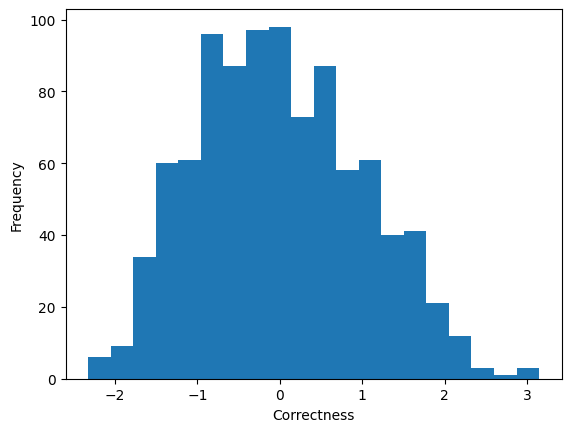

In [76]:
plt.hist(correctness, bins=20)
plt.xlabel("Correctness")
plt.ylabel("Frequency")
plt.show()

In [77]:
question_info['correctness'] = correctness
print(question_info)

     correctness
0      -0.405919
1       0.411018
2      -0.777723
3       1.926059
4      -0.674342
..           ...
943     0.379737
944    -2.324861
945    -0.540745
946    -0.303761
947     0.702727

[948 rows x 1 columns]


<h1>Difficulty</h1>

In [78]:
grade = []
for i in range(max(data['UserId'])+1):
    student = data[data['UserId'] == i]
    correct = student[student['IsCorrect'] == 1]
    
    if len(student) != 0:
        grade.append(len(correct)/len(student))
    else:
        grade.append(0)
grade = pd.Series(grade)
print(grade)

0       0.000000
1       0.419355
2       0.366667
3       1.000000
4       0.681416
          ...   
6143    0.738462
6144    0.326531
6145    0.494118
6146    0.724382
6147    0.717014
Length: 6148, dtype: float64


In [79]:
difficulty = []
for i in range(len(data)):
    difficulty.append(data['IsCorrect'][i] - grade[data['UserId'][i]])
data['difficulty'] = difficulty
print(data)

         QuestionId  UserId  AnswerId  IsCorrect  CorrectAnswer  AnswerValue   
0               898    2111    280203          1              2            2  \
1               767    3062     55638          1              3            3   
2               165    1156    386475          1              2            2   
3               490    1653    997498          1              4            4   
4               298    3912    578636          1              3            3   
...             ...     ...       ...        ...            ...          ...   
1382722          80    2608     57945          1              2            2   
1382723         707    2549    584230          0              2            1   
1382724         840    5901   1138956          1              1            1   
1382725         794    3854   1151183          0              1            3   
1382726         157    3184   1321883          1              3            3   

         difficulty  
0          0.3743

In [80]:
difficulty = data.groupby('QuestionId')['difficulty'].mean()
# difficulty = pd.Series(difficulty)
difficulty = difficulty.values.reshape(-1, 1)
scaler = StandardScaler()
scaler.fit(difficulty)
difficulty = pd.Series(scaler.transform(difficulty).flatten())
print(difficulty)

0     -0.559674
1     -0.230804
2     -0.848934
3      1.896612
4     -0.794151
         ...   
943    0.220628
944   -2.268151
945   -0.605126
946   -0.009911
947    0.766778
Length: 948, dtype: float64


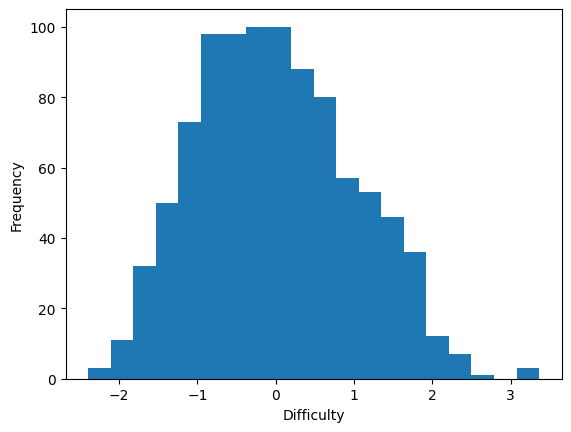

In [81]:
plt.hist(difficulty, bins=20)
plt.xlabel("Difficulty")
plt.ylabel("Frequency")
plt.show()

In [82]:
question_info['difficulty'] = difficulty
print(question_info)

     correctness  difficulty
0      -0.405919   -0.559674
1       0.411018   -0.230804
2      -0.777723   -0.848934
3       1.926059    1.896612
4      -0.674342   -0.794151
..           ...         ...
943     0.379737    0.220628
944    -2.324861   -2.268151
945    -0.540745   -0.605126
946    -0.303761   -0.009911
947     0.702727    0.766778

[948 rows x 2 columns]


<h1>Text Length</h1>

In [83]:
import numpy as np
from pytesseract import Output
import pytesseract
import cv2
from PIL import Image

In [84]:
text_length = []
pytesseract.pytesseract.tesseract_cmd = 'C:\Program Files\Tesseract-OCR/tesseract.exe'
for i in range(948):
    path = f'data/images/{i}.jpg'
    image = cv2.imread(path)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    text = pytesseract.image_to_string(rgb_image)
    result = ""
    for i in text:
        if i != '\n':
            result += i
    text_length.append(len(result))
print(text_length)

[136, 31, 100, 31, 131, 88, 128, 165, 162, 79, 99, 51, 221, 35, 124, 50, 72, 86, 136, 124, 55, 88, 57, 101, 90, 340, 101, 7, 199, 25, 247, 19, 45, 87, 0, 58, 213, 327, 238, 40, 237, 97, 80, 44, 194, 42, 283, 63, 147, 202, 203, 181, 50, 289, 228, 77, 90, 39, 61, 264, 142, 52, 89, 165, 59, 65, 316, 91, 214, 22, 105, 0, 76, 14, 58, 102, 96, 220, 58, 43, 211, 2, 63, 171, 125, 145, 60, 228, 127, 63, 64, 46, 128, 116, 296, 111, 81, 108, 58, 93, 88, 231, 132, 20, 86, 66, 227, 60, 120, 76, 161, 83, 79, 11, 35, 7, 95, 85, 92, 63, 64, 45, 66, 55, 184, 40, 118, 0, 0, 174, 160, 145, 143, 42, 114, 177, 231, 150, 29, 45, 54, 175, 238, 84, 0, 190, 245, 143, 150, 408, 63, 228, 225, 54, 60, 100, 39, 175, 0, 144, 86, 25, 88, 65, 181, 191, 247, 125, 100, 73, 151, 40, 186, 151, 131, 132, 145, 7, 31, 56, 7, 90, 138, 264, 66, 98, 0, 107, 243, 166, 81, 233, 296, 249, 192, 9, 139, 120, 179, 129, 92, 36, 219, 130, 65, 107, 160, 62, 104, 168, 116, 40, 112, 103, 195, 154, 81, 116, 235, 114, 0, 86, 62, 70, 95, 93

In [85]:
text_length = pd.Series(text_length).values.reshape(-1, 1)
scaler = StandardScaler()
scaler.fit(text_length)
text_length = pd.Series(scaler.transform(text_length).flatten())
print(text_length)

0      0.296937
1     -1.092744
2     -0.179525
3     -1.092744
4      0.230762
         ...   
943   -1.278035
944    0.138116
945    0.005766
946   -0.285405
947    0.005766
Length: 948, dtype: float64


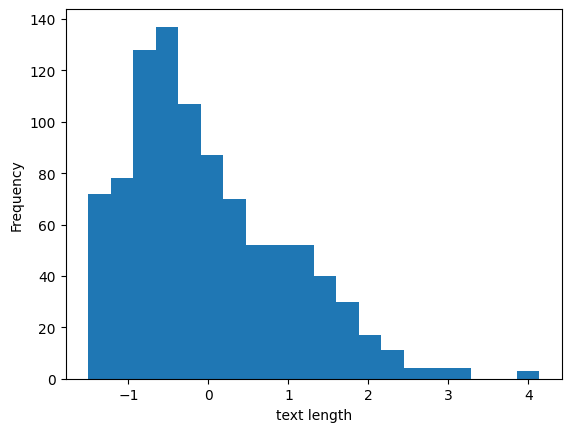

In [86]:
plt.hist(text_length, bins=20)
plt.xlabel("text length")
plt.ylabel("Frequency")
plt.show()

In [87]:
question_info['text_length'] = text_length
print(question_info)

     correctness  difficulty  text_length
0      -0.405919   -0.559674     0.296937
1       0.411018   -0.230804    -1.092744
2      -0.777723   -0.848934    -0.179525
3       1.926059    1.896612    -1.092744
4      -0.674342   -0.794151     0.230762
..           ...         ...          ...
943     0.379737    0.220628    -1.278035
944    -2.324861   -2.268151     0.138116
945    -0.540745   -0.605126     0.005766
946    -0.303761   -0.009911    -0.285405
947     0.702727    0.766778     0.005766

[948 rows x 3 columns]


<h1>Color Number</h1>

In [88]:
def count_colors(image_path):
    image = Image.open(image_path)
    colors = image.getcolors(image.size[0] * image.size[1])
    num_colors = len(colors)
    return num_colors

In [89]:
color_num = []
for i in range(948):
    path = f'data/images/{i}.jpg'
    color_count = count_colors(path)
    color_num.append(color_count)

In [90]:
color_num = pd.Series(color_num).values.reshape(-1, 1)
scaler = StandardScaler()
scaler.fit(color_num)
color_num = pd.Series(scaler.transform(color_num).flatten())
print(color_num)

0     -0.589463
1     -0.565549
2     -0.582041
3     -0.475663
4      1.656033
         ...   
943   -0.578743
944    0.564209
945   -0.565549
946    0.594721
947   -0.554004
Length: 948, dtype: float64


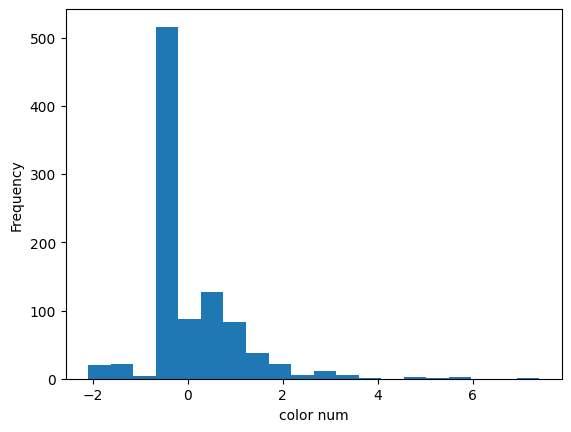

In [91]:
plt.hist(color_num, bins=20)
plt.xlabel("color num")
plt.ylabel("Frequency")
plt.show()

In [92]:
question_info['color_num'] = color_num
print(question_info)

     correctness  difficulty  text_length  color_num
0      -0.405919   -0.559674     0.296937  -0.589463
1       0.411018   -0.230804    -1.092744  -0.565549
2      -0.777723   -0.848934    -0.179525  -0.582041
3       1.926059    1.896612    -1.092744  -0.475663
4      -0.674342   -0.794151     0.230762   1.656033
..           ...         ...          ...        ...
943     0.379737    0.220628    -1.278035  -0.578743
944    -2.324861   -2.268151     0.138116   0.564209
945    -0.540745   -0.605126     0.005766  -0.565549
946    -0.303761   -0.009911    -0.285405   0.594721
947     0.702727    0.766778     0.005766  -0.554004

[948 rows x 4 columns]


<h1>Subjects</h1>

In [93]:
que_data = pd.read_csv('data/metadata/question_metadata_task_3_4.csv')
que_data.head()

,QuestionId,SubjectId
0,684,"[3, 71, 98, 209]"
1,87,"[3, 71, 98, 209]"
2,679,"[3, 71, 98, 209]"
3,685,"[3, 71, 98, 209]"
4,222,"[3, 71, 98, 209]"


In [94]:
subject = []
for i in range(948):
    for j in range(len(que_data)):
        if i == que_data['QuestionId'][j]:
            sub_str = que_data['SubjectId'][j]
            sub_str = sub_str.replace('[', '')
            sub_str = sub_str.replace(']', '')
            sub_str = sub_str.replace(',', '')
            sub_str = sub_str.split(' ')
            subject.append(len(sub_str))
print(subject)

[4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

In [95]:
subject = pd.Series(subject).values.reshape(-1, 1)
scaler = StandardScaler()
scaler.fit(subject)
subject = pd.Series(scaler.transform(subject).flatten())
print(subject)

question_info['subject'] = subject
print(question_info)

0      -0.116991
1      -0.116991
2      13.746451
3      -0.116991
4      -0.116991
         ...    
943    -0.116991
944    -0.116991
945    -0.116991
946    -0.116991
947    -0.116991
Length: 948, dtype: float64
     correctness  difficulty  text_length  color_num    subject
0      -0.405919   -0.559674     0.296937  -0.589463  -0.116991
1       0.411018   -0.230804    -1.092744  -0.565549  -0.116991
2      -0.777723   -0.848934    -0.179525  -0.582041  13.746451
3       1.926059    1.896612    -1.092744  -0.475663  -0.116991
4      -0.674342   -0.794151     0.230762   1.656033  -0.116991
..           ...         ...          ...        ...        ...
943     0.379737    0.220628    -1.278035  -0.578743  -0.116991
944    -2.324861   -2.268151     0.138116   0.564209  -0.116991
945    -0.540745   -0.605126     0.005766  -0.565549  -0.116991
946    -0.303761   -0.009911    -0.285405   0.594721  -0.116991
947     0.702727    0.766778     0.005766  -0.554004  -0.116991

[948 rows x 5 co

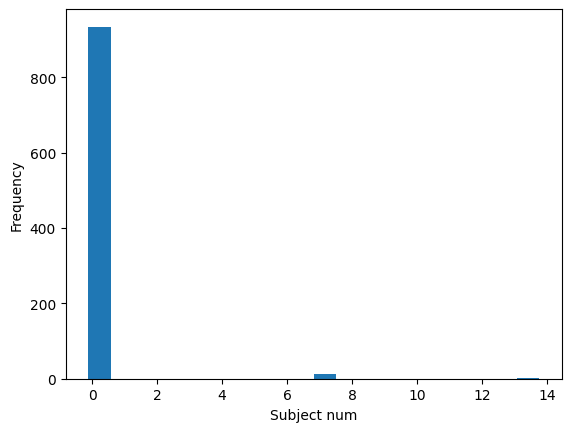

In [96]:
plt.hist(subject, bins=20)
plt.xlabel("Subject num")
plt.ylabel("Frequency")
plt.show()

<h1>PCA</h1>

<Axes: >

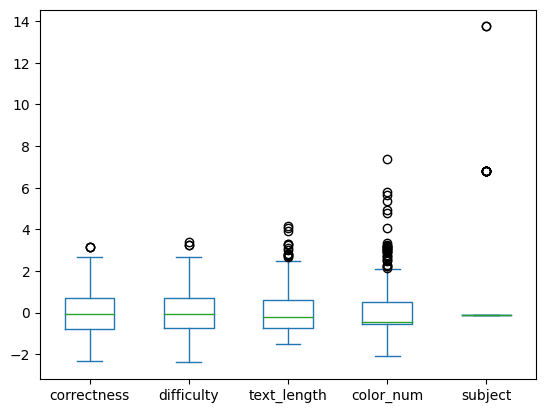

In [208]:
question_info.plot.box()

In [209]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pd.DataFrame()
X['difficulty'] = question_info['difficulty']
X['correctness'] = question_info['correctness']
X['text_length'] = question_info['text_length']
# X['subject'] = question_info['subject']
# X['color_num'] = question_info['color_num']
# X = question_info
pca.fit(X)

PCA(n_components=2)

In [210]:
pca.components_.T

array([[ 0.6724493 ,  0.21211497],
       [ 0.66937329,  0.23453345],
       [-0.31583435,  0.94868398]])

In [211]:
pca.components_[1] *= -1

loadings = pca.components_.T
loadings
print(loadings)
print(loadings[0])

[[ 0.6724493  -0.21211497]
 [ 0.66937329 -0.23453345]
 [-0.31583435 -0.94868398]]
[ 0.6724493  -0.21211497]


In [212]:
XX = pca.transform(X)
XX.shape

(948, 2)

(-4.044497315584172, 4.954946740972286, -3.98567325165215, 2.290680548602916)

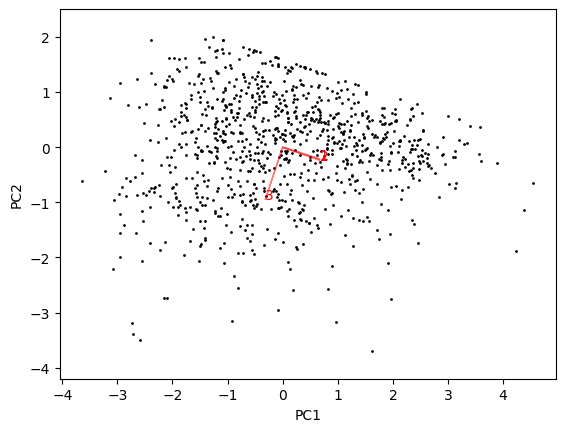

In [213]:
# plot projected data
plt.scatter(XX[:,0], XX[:,1], color='k', s=1)
# for i in range(len(question_info)):
#     plt.text(XX[i,0]+0.1, XX[i,1]-0.05, i)
    
# feature_names = ['correctness', 'difficulty', 'text_length', 'color_num']
feature_names = ['1', '2', '3', '4', '5', '6']
    
# plot the loadings
for i, feature in enumerate(loadings):
    plt.arrow(0, 0, feature[0], feature[1], color='r', alpha=0.5)
    plt.text(feature[0], feature[1], f"{feature_names[i]}", color='r')
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axis('equal')
# plt.grid('on')

In [214]:
pca.explained_variance_ratio_

array([0.70357166, 0.2923886 ])

<h1>Validation</h1>

In [215]:
def evaluate(truth, submission):
    # extract ranking
    left = list(truth.left)
    right = list(truth.right)
#     if len(left) != len(right):
#     message = 'left and right lengths are not the same'
#     sys.exit(message)

    submission_left = []
    submission_right = []
    submission_preference = []
    for idx in range(len(left)):
        submission_left.append(left[idx])
        submission_right.append(right[idx])
        ranking_left = submission[submission.QuestionId==left[idx]].ranking.values[0]
        ranking_right = submission[submission.QuestionId==right[idx]].ranking.values[0]
        preference = 1 if ranking_left < ranking_right else 2
        submission_preference.append(preference)
    print(submission_preference)
    return submission_preference

In [216]:
rank_score1 = correctness
rank1 = rank_score1.rank(ascending=True)
rank_score2 = difficulty
rank2 = rank_score2.rank(ascending=True)
rank_score3 = text_length
rank3 = rank_score3.rank(ascending=False)
rank_score4 = color_num
rank4 = rank_score4.rank(ascending=True)
rank_score5 = subject
rank4 = rank_score5.rank(ascending=False)

In [217]:
# pca1 = correctness*loadings[0][0] + difficulty*loadings[1][0] + text_length*loadings[2][0] + color_num*loadings[3][0]
# pca2 = correctness*loadings[0][1] + difficulty*loadings[1][1] + text_length*loadings[2][1] + color_num*loadings[3][1]
pca1 = difficulty*loadings[0][0] + correctness*loadings[1][0] + text_length*loadings[2][0] #+ subject*loadings[3][0] + color_num*loadings[4][0]
pca2 = difficulty*loadings[0][1] + correctness*loadings[1][1] + text_length*loadings[2][1] #+ subject*loadings[3][1] + color_num*loadings[4][0]
rank_score_fin = pca1 * pca.explained_variance_ratio_[0] + pca2 * pca.explained_variance_ratio_[1]
rank_fin = rank_score_fin.rank(ascending=True)

In [218]:
df = pd.read_csv('template.csv')
# df['ranking'] = rank
df['ranking'] = rank_fin
df.to_csv('result/template.csv', mode='w')

In [219]:
eval_validation = pd.read_csv('data/test_data/quality_response_remapped_public.csv')
eval_validation['score'] = eval_validation.filter(regex='^T', axis = 1).mean(axis=1)
eval_validation

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score
0,0,0,909,318,2,2,2,1.0,2,1.8
1,16,16,285,609,2,2,2,2.0,2,2.0
2,48,48,132,271,1,2,2,2.0,1,1.6
3,38,38,704,127,2,2,1,2.0,2,1.8
4,33,33,16,586,1,1,2,2.0,2,1.6
5,17,17,56,865,2,1,2,2.0,2,1.8
6,27,27,233,478,1,1,1,1.0,2,1.2
7,41,41,877,620,2,2,2,2.0,2,2.0
8,5,5,246,733,1,1,1,2.0,1,1.2
9,35,35,668,741,1,1,1,1.0,1,1.0


In [220]:
validation_result = evaluate(eval_validation, df)

[2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1]


In [221]:
from sklearn.metrics import accuracy_score

t1_acc = accuracy_score(eval_validation['T1_ALR'], validation_result)
t2_acc = accuracy_score(eval_validation['T2_CL'], validation_result)
t3_acc = accuracy_score(eval_validation['T3_GF'], validation_result)
t4_acc = accuracy_score(eval_validation['T4_MQ'], validation_result)
t5_acc = accuracy_score(eval_validation['T5_NS'], validation_result)
print(t1_acc)
print(t2_acc)
print(t3_acc)
print(t4_acc)
print(t5_acc)
print((t1_acc+t2_acc+t3_acc+t4_acc+t5_acc)/5)

0.76
0.72
0.88
0.6
0.76
0.744


<h1>Test</h1>

In [222]:
eval_test = pd.read_csv('data/test_data/quality_response_remapped_private.csv')
eval_test['score'] = eval_test.filter(regex='^T', axis = 1).mean(axis=1)
eval_test

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score
0,15,15,145,762,2,2,2,2,2,2.0
1,31,31,307,208,1,1,1,2,1,1.2
2,25,25,278,195,1,1,1,1,1,1.0
3,3,3,13,153,2,2,2,2,2,2.0
4,40,40,23,100,2,1,1,1,1,1.2
5,23,23,532,104,1,1,2,2,1,1.4
6,21,21,155,479,1,1,1,1,2,1.2
7,1,1,304,907,1,1,1,1,1,1.0
8,26,26,242,129,1,1,1,1,1,1.0
9,39,39,688,287,2,1,2,2,2,1.8


In [223]:
test_result = evaluate(eval_test, df)

[2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2]


In [224]:
t1_acc2 = accuracy_score(eval_test['T1_ALR'], test_result)
t2_acc2 = accuracy_score(eval_test['T2_CL'], test_result)
t3_acc2 = accuracy_score(eval_test['T3_GF'], test_result)
t4_acc2 = accuracy_score(eval_test['T4_MQ'], test_result)
t5_acc2 = accuracy_score(eval_test['T5_NS'], test_result)
print(t1_acc2)
print(t2_acc2)
print(t3_acc2)
print(t4_acc2)
print(t5_acc2)
print((t1_acc2+t2_acc2+t3_acc2+t4_acc2+t5_acc2)/5)

0.68
0.64
0.72
0.68
0.68
0.68


 <h1>Total</h1>

In [225]:
eval_total = pd.concat([eval_validation, eval_test])
eval_total

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score
0,0,0,909,318,2,2,2,1.0,2,1.8
1,16,16,285,609,2,2,2,2.0,2,2.0
2,48,48,132,271,1,2,2,2.0,1,1.6
3,38,38,704,127,2,2,1,2.0,2,1.8
4,33,33,16,586,1,1,2,2.0,2,1.6
5,17,17,56,865,2,1,2,2.0,2,1.8
6,27,27,233,478,1,1,1,1.0,2,1.2
7,41,41,877,620,2,2,2,2.0,2,2.0
8,5,5,246,733,1,1,1,2.0,1,1.2
9,35,35,668,741,1,1,1,1.0,1,1.0


In [226]:
total_result = evaluate(eval_total, df)

[2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2]


In [227]:
t1_acc2 = accuracy_score(eval_total['T1_ALR'], total_result)
t2_acc2 = accuracy_score(eval_total['T2_CL'], total_result)
t3_acc2 = accuracy_score(eval_total['T3_GF'], total_result)
t4_acc2 = accuracy_score(eval_total['T4_MQ'], total_result)
t5_acc2 = accuracy_score(eval_total['T5_NS'], total_result)
print(t1_acc2)
print(t2_acc2)
print(t3_acc2)
print(t4_acc2)
print(t5_acc2)
print((t1_acc2+t2_acc2+t3_acc2+t4_acc2+t5_acc2)/5)

0.72
0.68
0.8
0.64
0.72
0.7120000000000001
